# III. Data Preprocessing and Model

#### In this part, I will use the collected dataset and use machine learning algorithms to build model to predict the tendency of stock prices. 

#### The algorithms I will use are Random Forest, Support Vector Machine(classifier), Neural Network. In order to find out more appropriate parameters for each algorithm, I will also tune each model and obtain the best estimators.

####  I will use R to do the Data Prepossessing part and use Python to build machine learning models. Since we have already tried to build the model in R studio in assigment 3, we would like to try some new tools like Python in the final project. The underlying methods and algorithms would be same.

- Required libraries

In [1]:
import numpy as np 
import pandas as pd 
import matplotlib.pyplot as plt

from sklearn.pipeline import Pipeline
from sklearn.preprocessing import MinMaxScaler,normalize,Normalizer
from sklearn.linear_model import LogisticRegression
from sklearn.svm import LinearSVC, SVC
from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.ensemble import VotingClassifier, RandomForestClassifier
from sklearn.neural_network import MLPClassifier
from sklearn.metrics import confusion_matrix, accuracy_score, fbeta_score, make_scorer, mean_squared_error
from sklearn.model_selection import GridSearchCV
from sklearn.linear_model import LogisticRegressionCV
import itertools

import numpy as np
import matplotlib.pyplot as plt

from sklearn.datasets import make_classification
from sklearn.ensemble import ExtraTreesClassifier

from sklearn.ensemble import RandomForestClassifier

from scipy.stats import randint as sp_randint
from sklearn.model_selection import RandomizedSearchCV
from time import time

import seaborn as sns

## III.1 Data preposessing

#### The original data is collected from bloomberg terminal. My partner and I did efforts to clean and preposess the data with using R and Python. However, the following part will not show the 'dirty work' we did (code will be attached). I will load the cleaned data directly.

![](14 stocks.png)

In [2]:
df = pd.read_csv('raw_data.csv')

In [3]:
df.head()

,symbol,Date,Open,High,Low,Close,Adj.Close,Volume,revenue,gross_profit,...,MFI,Volat,CMO.Ad,CMO.Vo,RunMean,RunSD,GMMA,KST,DPO,DVI
0,BIDU,2014-01-16,171.300003,174.570007,169.750000,173.000000,173.000000,2975000,9.522913e+09,5.866424e+09,...,42.611467,0.195193,5.660541,-36.456573,133.189018,190.302970,1.332843e+07,-315.754725,-11480300,0.596032
1,QCOM,2014-01-16,74.470001,74.879997,74.010002,74.720001,65.324356,10263200,6.622000e+09,3.916000e+09,...,39.304866,0.194706,-2.040986,2.451821,104.865723,173.466198,1.179582e+07,-294.546266,-8751740,0.768254
2,IBM,2014-01-16,187.529999,188.990005,186.800003,188.759995,163.875153,4770300,2.738500e+10,1.062700e+10,...,45.818767,0.192173,6.384432,-13.435674,121.638723,172.565988,8.283059e+06,-246.890280,-9011560,0.613492
3,CSCO,2014-01-16,22.850000,22.910000,22.629999,22.780001,19.831251,38918100,1.208500e+10,7.407000e+09,...,40.648559,0.182808,-0.972015,7.983797,123.149723,171.520173,2.360058e+07,-191.905480,25906940,0.378571
4,ADBE,2014-01-16,61.590000,61.980000,61.259998,61.630001,61.630001,3747800,1.000120e+09,8.516110e+08,...,43.238445,0.175726,1.249604,-4.414016,125.623723,170.311890,1.367419e+07,-113.246354,-9203390,0.365079


##### This main dataset including 14 stocks.

In [4]:
list(df.symbol.unique())

['BIDU',
 'QCOM',
 'IBM',
 'CSCO',
 'ADBE',
 'CRM',
 'TXN',
 'INTC',
 'NVDA',
 'MSFT',
 'GOOGL',
 'ORCL',
 'AAPL',
 'MU']

##### The objective of this project 

In [5]:
df['tendency'] = np.where(df.Close - df.Open > 0, 'Up', 'Down')

In [6]:
BIDU = df[df.symbol == 'BIDU']
QCOM = df[df.symbol == 'QCOM']
IBM = df[df.symbol == 'IBM']
CSCO = df[df.symbol == 'CSCO']
ADBE = df[df.symbol == 'ADBE']
CRM = df[df.symbol == 'CRM']
TXN = df[df.symbol == 'TXN']
INTC = df[df.symbol == 'INTC']
NVDA = df[df.symbol == 'NVDA']
MSFT = df[df.symbol == 'MSFT']
GOOGL = df[df.symbol == 'GOOGL']
ORCL = df[df.symbol == 'ORCL']
AAPL = df[df.symbol == 'AAPL']
MU = df[df.symbol == 'MU']

In [7]:
df.columns

Index(['symbol', 'Date', 'Open', 'High', 'Low', 'Close', 'Adj.Close', 'Volume',
       'revenue', 'gross_profit', 'net_income', 'cash_from_operation',
       'basic_earning_per_share', 'free_cash_flow', 'market_capital',
       'enterprise_value', 'VWAP_volume', 'VWAP_bid_volume_percentage',
       'VWAP_ask_volume_percentage', 'px_ask', 'px_bid', 'px_mid', 'px_volume',
       'total_analyst_recommendation', 'turn_over', 'egy_rec', 'MACD', 'RSI',
       'TRIX', 'SAR', 'ROC.Vo', 'ROC.Cl', 'CCI', 'ATR', 'SMI', 'ADX', 'Aroon',
       'BB', 'ChaikinVol', 'CLV', 'EMV', 'MFI', 'Volat', 'CMO.Ad', 'CMO.Vo',
       'RunMean', 'RunSD', 'GMMA', 'KST', 'DPO', 'DVI', 'tendency'],
      dtype='object')

In [8]:
len(df.columns)

52

#### In this part, I concat 14 datasets and got 1 main dataset as 'raw_data.csv'. There are 52 columns including symbol which identify different stock tickets and Date which is the time series stap and the other independent variables and dependent variables(tendency) we already introduced in the previous parts. The techniqal predictors like MACD, RSI, TRIX was calculated with function in R studio with quantmod library and TTR library(code attached).

#### Also, I seperated the main dataset into 14 subdataset according the tickets name.

In [9]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 18059 entries, 0 to 18058
Data columns (total 52 columns):
symbol                          18059 non-null object
Date                            18059 non-null object
Open                            18059 non-null float64
High                            18059 non-null float64
Low                             18059 non-null float64
Close                           18059 non-null float64
Adj.Close                       18059 non-null float64
Volume                          18059 non-null int64
revenue                         18059 non-null float64
gross_profit                    18059 non-null float64
net_income                      18059 non-null float64
cash_from_operation             18059 non-null float64
basic_earning_per_share         18059 non-null float64
free_cash_flow                  18059 non-null float64
market_capital                  18059 non-null float64
enterprise_value                18059 non-null float64
VWAP_volume    

In [10]:
df.describe()

,Open,High,Low,Close,Adj.Close,Volume,revenue,gross_profit,net_income,cash_from_operation,...,MFI,Volat,CMO.Ad,CMO.Vo,RunMean,RunSD,GMMA,KST,DPO,DVI
count,18059.000000,18059.000000,18059.000000,18059.000000,18059.000000,1.805900e+04,1.805900e+04,1.805900e+04,1.805900e+04,1.805900e+04,...,18059.000000,18059.000000,18059.000000,18059.000000,18059.000000,18059.000000,1.805900e+04,18059.000000,1.805900e+04,18059.000000
mean,119.346919,120.399063,118.234261,119.349536,116.585815,1.718009e+07,1.277490e+10,6.809537e+09,2.588885e+09,4.031625e+09,...,59.868892,0.211419,-0.000447,-0.017308,118.931814,154.479312,1.721204e+07,-1.032719,-5.409197e+04,0.503411
std,175.215043,176.539832,173.697194,175.158512,175.453048,2.072964e+07,1.373257e+10,5.855213e+09,3.402457e+09,4.708811e+09,...,16.772479,0.073395,14.658404,11.136296,45.496788,87.742474,1.213101e+07,285.191008,1.954321e+07,0.248344
min,6.600000,6.670000,6.450000,6.630000,6.630000,5.206000e+05,6.954670e+08,2.170000e+08,-5.953000e+09,-6.580000e+08,...,9.376393,0.080242,-76.113940,-66.934727,32.618000,13.652954,1.517170e+06,-998.910743,-6.293755e+07,0.003968
25%,35.014999,35.254999,34.764999,35.009998,33.089050,3.825700e+06,3.028000e+09,1.511039e+09,3.620000e+08,7.350810e+08,...,48.563582,0.167519,-2.875123,-5.103133,81.966500,61.117030,9.322607e+06,-196.782029,-1.152518e+07,0.295238
50%,60.500000,61.127144,59.880001,60.599998,56.318432,9.504400e+06,9.522913e+09,7.276000e+09,2.045000e+09,3.174000e+09,...,62.952710,0.198005,0.060122,-0.042473,115.597520,158.334194,1.423622e+07,9.315163,-5.262550e+06,0.502381
75%,128.464996,129.610001,127.474998,128.629997,123.072307,2.399770e+07,1.637400e+10,9.388000e+09,2.950000e+09,4.722000e+09,...,72.935385,0.237753,2.971594,5.029891,145.487500,223.218946,2.129667e+07,201.682162,8.058325e+06,0.711111
max,1188.000000,1198.000000,1184.060059,1187.560059,1187.560059,3.652131e+08,8.829300e+10,3.391200e+10,2.471181e+10,3.372200e+10,...,95.782460,1.570447,75.351047,73.819299,311.772003,410.328487,1.874016e+08,929.178551,3.022941e+08,1.000000


#### Now I will seperate the dependent variable and independent variable. X will include all independent variables and y will represent the target output - tendency of stock price.

In [11]:
X = df.iloc[:,2:-1]

In [12]:
y = df.tendency

In [13]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, shuffle=False)

In [14]:
def plot_confusion_matrix(cm, classes,
                          normalize=False,
                          title='Confusion matrix',
                          cmap=plt.cm.Blues):
    """
    This function prints and plots the confusion matrix.
    Normalization can be applied by setting `normalize=True`.
    """
    if normalize:
        cm = cm.astype('float') / cm.sum(axis=1)[:, np.newaxis]
        print("Normalized confusion matrix")
    else:
        print('Confusion matrix, without normalization')

    print(cm)

    plt.imshow(cm, interpolation='nearest', cmap=cmap)
    plt.title(title)
    plt.colorbar()
    tick_marks = np.arange(len(classes))
    plt.xticks(tick_marks, classes, rotation=45)
    plt.yticks(tick_marks, classes)

    fmt = '.2f' if normalize else 'd'
    thresh = cm.max() / 2.
    for i, j in itertools.product(range(cm.shape[0]), range(cm.shape[1])):
        plt.text(j, i, format(cm[i, j], fmt),
                 horizontalalignment="center",
                 color="white" if cm[i, j] > thresh else "black")

    plt.tight_layout()
    plt.ylabel('True label')
    plt.xlabel('Predicted label')

## III. 2 Random Forest Algorithm

#### The first algorithm I will use is Random Forest Algorithm. It is an upgrated verision of decision tree since it randomly start, bag the tree, boost to sequenced tree, and then decorrelate those trees. Finally, it vote to make decision in classification problem. 
#### Meanwhile, it also reduce the overfiting and could indicate the importance of each independent variable.  
#### That's the reason why I choose Random Forest Algorithm as the first method.

### Train

In [15]:
rf=RandomForestClassifier()
rf = rf.fit(X_train, y_train)

In [16]:
new_layer = ['Up', 'Down']
ticket_li = ['BIDU','QCOM','IBM','CSCO','ADBE','CRM','TXN','INTC','NVDA','MSFT','GOOGL','ORCL','AAPL','MU']

### Predict

Confusion matrix, without normalization
[[1256  475]
 [ 702 1179]]


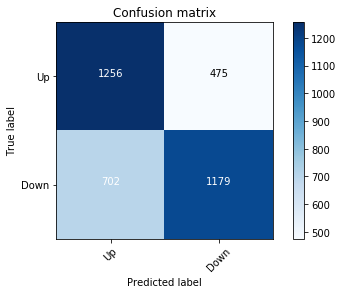

In [17]:
rf_prediction= rf.predict(X_test)
xtab = confusion_matrix(y_test, rf_prediction)
plot_confusion_matrix(xtab, classes=new_layer)

In [18]:
rf_acc = accuracy_score(y_test, rf_prediction)
print('Accuracy:',rf_acc)

Accuracy: 0.6741417497231451


#### The confusion matrix seems good. We have 66.86% accuracy at the first try. Now I would like to build two more models only for 'Up' class or  'Down' class.

In [19]:
rf_acc_li = []
for ticket_name in ticket_li:
    ticket_df = df[df.symbol == ticket_name]
    ticket_X = ticket_df.iloc[:,2:-1]
    tiecket_y = ticket_df.tendency
    ticket_X_train, ticket_X_test, ticket_y_train, ticket_y_test = train_test_split(ticket_X, tiecket_y, test_size=0.2, shuffle=False)
    y_adj = np.array(ticket_y_train)
    scores = (cross_val_score(rf, ticket_X_train, y_adj, cv=10, scoring='accuracy')).mean()
    rf_acc_li.append([ticket_name, scores])
rf_acc_li

[['BIDU', 0.6405993278566094],
 ['QCOM', 0.6523541492773359],
 ['IBM', 0.670870319001387],
 ['CSCO', 0.6610859728506788],
 ['ADBE', 0.6802814142834132],
 ['CRM', 0.6659948789075003],
 ['TXN', 0.6783140403286034],
 ['INTC', 0.6622655122655123],
 ['NVDA', 0.6952483196415236],
 ['MSFT', 0.6508524485223514],
 ['GOOGL', 0.6435423347830543],
 ['ORCL', 0.633724705714997],
 ['AAPL', 0.6201923076923077],
 ['MU', 0.6654312920089619]]

#### The performance of sub dataset looks similar to the main dataset. The accuracy rate between 61.06% and 69.14%. 

#### I think tune the Random Forest model will elevate the performance.

#### Now I will check what kinds of parameters could be changed.

### Parameters

In [20]:
rf.get_params().keys()

dict_keys(['bootstrap', 'class_weight', 'criterion', 'max_depth', 'max_features', 'max_leaf_nodes', 'min_impurity_decrease', 'min_impurity_split', 'min_samples_leaf', 'min_samples_split', 'min_weight_fraction_leaf', 'n_estimators', 'n_jobs', 'oob_score', 'random_state', 'verbose', 'warm_start'])

### Tune with gridsearch

In [ ]:
%%time
#tuning
param_grid = { 
    'n_estimators': [100, 200, 700],
    'max_features': ['auto','sqrt', 'log2']
}

CV_rf_grid = GridSearchCV(estimator=rf, param_grid=param_grid, cv= 5)
CV_rf_grid.fit(X_train, y_train)
print (CV_rf_grid.best_params_)

#### It took 16min 27s to tune the random forest model. And I got a better parameter now. I will use this better parameter to fit the dataset and predict the tendency of stock prices.

Confusion matrix, without normalization
[[1234  497]
 [ 562 1319]]


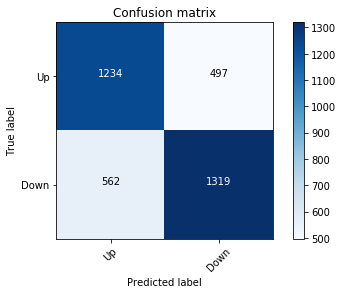

In [22]:
rf_best_grid = CV_rf_grid.best_estimator_
rf_best_grid = rf_best_grid.fit(X_train, y_train)
rf_best_prediction_grid = rf_best_grid.predict(X_test)
xtab = confusion_matrix(y_test, rf_best_prediction_grid)
plot_confusion_matrix(xtab, classes=new_layer)

In [23]:
rf_best_acc_grid = accuracy_score(y_test, rf_best_prediction_grid)
print('Accuracy:',rf_best_acc_grid) 

Accuracy: 0.7068106312292359


#### The result seems good. The accuracy was improved from 66.86% to 71.34 %.

#### Now, I will try the random search method to tune the model.

### Tuning with random search

In [24]:
param_dist = {"max_depth": [3, None],
              "max_features": sp_randint(1, 11),
              "min_samples_split": sp_randint(2, 11),
              "min_samples_leaf": sp_randint(1, 11),
              "bootstrap": [True, False],
              "criterion": ["gini", "entropy"]}

# run randomized search
n_iter_search = 100
CV_rf_random = RandomizedSearchCV(rf, param_distributions=param_dist,n_iter=n_iter_search)

In [25]:
start = time()
CV_rf_random.fit(X_train, y_train)

RandomizedSearchCV(cv=None, error_score='raise',
          estimator=RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
            max_depth=None, max_features='auto', max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, n_estimators=10, n_jobs=1,
            oob_score=False, random_state=None, verbose=0,
            warm_start=False),
          fit_params=None, iid=True, n_iter=100, n_jobs=1,
          param_distributions={'max_depth': [3, None], 'max_features': <scipy.stats._distn_infrastructure.rv_frozen object at 0x0000016BCB561278>, 'min_samples_split': <scipy.stats._distn_infrastructure.rv_frozen object at 0x0000016BCBCE0A90>, 'min_samples_leaf': <scipy.stats._distn_infrastructure.rv_frozen object at 0x0000016BCD95F358>, 'bootstrap': [True, False], 'criterion': ['gini', 'entropy']},
          pre_dispatch='2*n_jobs', random_state

In [26]:
def report(results, n_top=3):
    for i in range(1, n_top + 1):
        candidates = np.flatnonzero(results['rank_test_score'] == i)
        for candidate in candidates:
            print("Model with rank: {0}".format(i))
            print("Mean validation score: {0:.3f} (std: {1:.3f})".format(
                  results['mean_test_score'][candidate],
                  results['std_test_score'][candidate]))
            print("Parameters: {0}".format(results['params'][candidate]))
            print("")

In [27]:
print("RandomizedSearchCV took %.2f seconds for %d candidates"
      " parameter settings." % ((time() - start), n_iter_search))
report(CV_rf_random.cv_results_)

RandomizedSearchCV took 132.46 seconds for 100 candidates parameter settings.
Model with rank: 1
Mean validation score: 0.706 (std: 0.013)
Parameters: {'bootstrap': False, 'criterion': 'gini', 'max_depth': 3, 'max_features': 10, 'min_samples_leaf': 10, 'min_samples_split': 5}

Model with rank: 2
Mean validation score: 0.705 (std: 0.014)
Parameters: {'bootstrap': True, 'criterion': 'entropy', 'max_depth': 3, 'max_features': 10, 'min_samples_leaf': 6, 'min_samples_split': 6}

Model with rank: 3
Mean validation score: 0.705 (std: 0.011)
Parameters: {'bootstrap': True, 'criterion': 'entropy', 'max_depth': 3, 'max_features': 9, 'min_samples_leaf': 9, 'min_samples_split': 5}



Confusion matrix, without normalization
[[1320  411]
 [ 650 1231]]


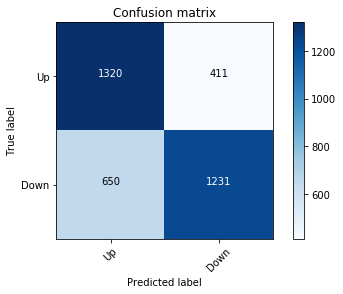

In [28]:
rf_best_random = CV_rf_random.best_estimator_
rf_best_random = rf_best_random.fit(X_train, y_train)
rf_best_prediction_random = rf_best_random.predict(X_test)
xtab = confusion_matrix(y_test, rf_best_prediction_random)
plot_confusion_matrix(xtab, classes=new_layer)

In [29]:
rf_best_acc_random = accuracy_score(y_test, rf_best_prediction_random)
print('Accuracy:',rf_best_acc_random) 

Accuracy: 0.7062569213732004


#### This report print top three best estimator and their accuracy performance. 

#### And now, I realize that using the random search approach to tune is faster than the grid search method and the accuracy rates are lower than the best estimator the grid search tuner found.

#### Comparing the grid search and random search method, I got the best accuracy rate xx.xx% and I will use this best estimator to pridiect the tendency of stock price of sub datasets of 14 stocks.

In [30]:
if rf_best_acc_random > rf_best_acc_grid:
    rf_best_m = rf_best_random
else:
    rf_best_m = rf_best_grid

In [31]:
rf_best_acc_li = []
for ticket_name in ticket_li:
    ticket_df = df[df.symbol == ticket_name]
    ticket_X = ticket_df.iloc[:,2:-1]
    tiecket_y = ticket_df.tendency
    ticket_X_train, ticket_X_test, ticket_y_train, ticket_y_test = train_test_split(ticket_X, tiecket_y, test_size=0.2, shuffle=False)
    y_adj = np.array(ticket_y_train)
    scores = (cross_val_score(rf_best_m, ticket_X_train, y_adj, cv=10, scoring='accuracy')).mean()
    rf_best_acc_li.append([ticket_name, scores])
rf_best_acc_li  

[['BIDU', 0.6946788648244959],
 ['QCOM', 0.6822745976658027],
 ['IBM', 0.6931914363953199],
 ['CSCO', 0.7006410256410256],
 ['ADBE', 0.6839860738918421],
 ['CRM', 0.718227088445535],
 ['TXN', 0.7159353995519042],
 ['INTC', 0.7148319934034219],
 ['NVDA', 0.7281646751306945],
 ['MSFT', 0.7061265514420854],
 ['GOOGL', 0.7006578658349075],
 ['ORCL', 0.6697484796756642],
 ['AAPL', 0.6703808446455506],
 ['MU', 0.6963125466766245]]

### Summary:
#### In a word, the original accuracy(default parameter) and the accuracy after tuning perform very well. Also, the model perform well when assigning it to each stock.

Main Accuracy:
    - Original:66.86%
    - After tuning: 71.34%
Each Stock Accuracy:
    - BIDU: 62.80% to 68.88%
    - QCOM: 62.53% to 68.41%
    - IBM: 64.58% to 69.70%
    - CSCO: 64.29 to 69.67%
    - ADBE: 64.61% to 68.97%
    - CRM: 66.03% to 71.44%
    - TXN: 67.06% to 72.65%
    - INTC: 65.92% to 71.48%
    - NVDA: 69.14% to 73.49%
    - MSFT: 63.92% to 71.38%
    - GOOGL: 66.76 to 70.64%
    - ORCL: 61.06% to 67.75%
    - AAPL: 64.03 to 67.13%
    - MU: 64.12% to 69.43%
### Importance 
#### Also, the random forest method will show the importance of each feature. I would like to check and plot the importance of each variable.

In [32]:
importances = rf_best_m.feature_importances_

In [33]:
importances_df = pd.DataFrame({'variables':list(X_train.columns), 'importances rate': list(importances)})

In [34]:
importance_rank = importances_df.sort_values(by='importances rate', ascending=False)

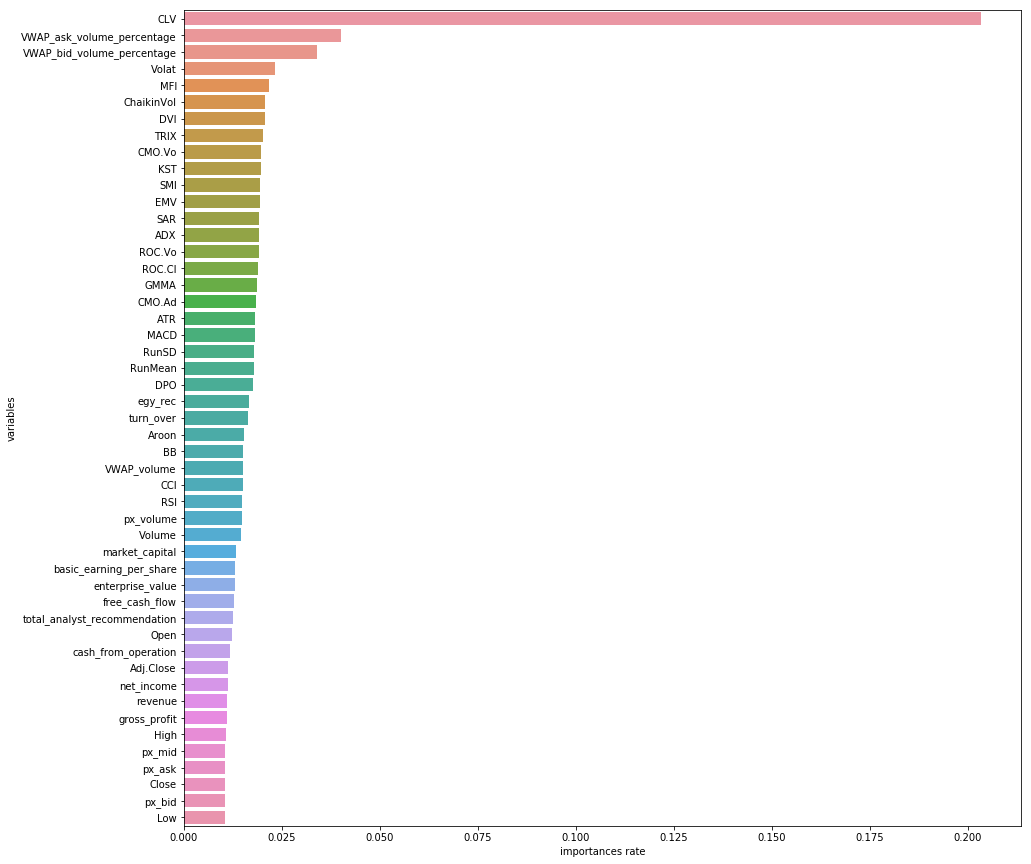

In [35]:
f, ax = plt.subplots(figsize=(15,15))

sns.barplot(y="variables", x="importances rate", data=importance_rank, ax=ax)

#### According to the importance report for Random Forest Algorithm, we got a chart that showed the CLV predictor is the most significant variable. And the other technical predictors also performed well. 

#### While, the financial information like Gross Profit, Revenue, Cash from Operation, Free Cash Flow and Market Capital seems insignificant for daily tendency of stock prices.  Also, the basic price information like Close, Low, High, Open and Adj.Close got a lower importances rate.

#### I will remove tail 15 of independent variables.

In [36]:
df_removed = df.drop(
    ['revenue', 'gross_profit','net_income','cash_from_operation', 'free_cash_flow', 'market_capital',
     'px_mid', 'px_ask', 'px_bid',
     'Close', 'Low', 'High', 'Open', 'Adj.Close',
     'total_analyst_recommendation'], axis=1)

In [37]:
df_removed.head()

,symbol,Date,Volume,basic_earning_per_share,enterprise_value,VWAP_volume,VWAP_bid_volume_percentage,VWAP_ask_volume_percentage,px_volume,turn_over,...,Volat,CMO.Ad,CMO.Vo,RunMean,RunSD,GMMA,KST,DPO,DVI,tendency
0,BIDU,2014-01-16,2975000,7.952,5.747847e+10,2914381,56.0385,56.0385,2975256,512783600.0,...,0.195193,5.660541,-36.456573,133.189018,190.302970,1.332843e+07,-315.754725,-11480300,0.596032,Up
1,QCOM,2014-01-16,10263200,1.110,9.463863e+10,10162472,53.2438,46.7562,10270124,766335500.0,...,0.194706,-2.040986,2.451821,104.865723,173.466198,1.179582e+07,-294.546266,-8751740,0.768254,Up
2,IBM,2014-01-16,4770300,2.300,2.280000e+11,4721754,58.0024,41.9976,4775167,898555500.0,...,0.192173,6.384432,-13.435674,121.638723,172.565988,8.283059e+06,-246.890280,-9011560,0.613492,Up
3,CSCO,2014-01-16,38918100,0.370,7.933212e+10,38599217,36.3774,63.6226,38925362,886703300.0,...,0.182808,-0.972015,7.983797,123.149723,171.520173,2.360058e+07,-191.905480,25906940,0.378571,Down
4,ADBE,2014-01-16,3747800,0.090,3.326501e+10,3666702,47.6594,52.3406,3747779,230889800.0,...,0.175726,1.249604,-4.414016,125.623723,170.311890,1.367419e+07,-113.246354,-9203390,0.365079,Up


In [38]:
X = df_removed.iloc[0:,2:-1]

In [39]:
y = df_removed.tendency

In [40]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, shuffle=False)

## III.3 Support Vector Machine - Classifier

#### The second method I will try is Support Vector Machine - Classifier. We hope SVM could help to accommodate non-linear class boundaries between 'Up' and 'Down'. In real world, multiple elements will influence the change of stock price. Those parameters might be on different dimension(3-D or more dimension) with different features. A good SVM classifier could help to change the dimension of the variables and find a 'line' to seperate the two classes 'Up' and 'Down'.

### Train

In [41]:
svm = SVC()
svm = svm.fit(X_train, y_train)

### Predict

Confusion matrix, without normalization
[[   0 1731]
 [   0 1881]]


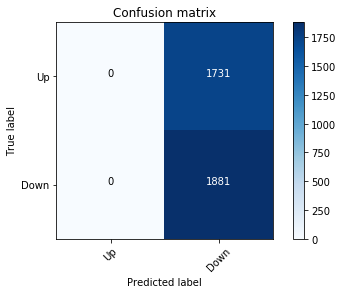

In [42]:
svm_prediction= svm.predict(X_test)
xtab = confusion_matrix(y_test, svm_prediction)
plot_confusion_matrix(xtab, classes=new_layer)

##### However, the result looks not good. It assigned almost all results to 'Down' tendency and seems could not classify the two differnt tendencies,

##### Let's see the accuracy for main dataset and each stock dataset.

### Accuracy

In [43]:
svm_acc = accuracy_score(y_test, svm_prediction)
print('Accuracy:',svm_acc)

Accuracy: 0.520764119601329


In [44]:
svm_acc_li = []
for ticket_name in ticket_li:
    ticket_df = df_removed[df_removed.symbol == ticket_name]
    ticket_X = ticket_df.iloc[:,2:-1]
    tiecket_y = ticket_df.tendency
    ticket_X_train, ticket_X_test, ticket_y_train, ticket_y_test = train_test_split(ticket_X, tiecket_y, test_size=0.2, shuffle=False)
    y_adj = np.array(ticket_y_train)
    scores = (cross_val_score(svm, ticket_X_train, y_adj, cv=10, scoring='accuracy')).mean()
    svm_acc_li.append([ticket_name, scores])
svm_acc_li

[['BIDU', 0.526558999253174],
 ['QCOM', 0.5279878530949348],
 ['IBM', 0.5154411607809666],
 ['CSCO', 0.5289592760180996],
 ['ADBE', 0.5478266997613085],
 ['CRM', 0.5029033749422098],
 ['TXN', 0.5555451829723674],
 ['INTC', 0.5257884972170687],
 ['NVDA', 0.526101568334578],
 ['MSFT', 0.5232173974892421],
 ['GOOGL', 0.517868177891022],
 ['ORCL', 0.5342992282798108],
 ['AAPL', 0.5096719457013574],
 ['MU', 0.5125840179238238]]

#### Poorly, the accuracy for main dataset is 52.07% and the accuracy for each stock is also low. The best accuracy is the model for TXN stock, which is 55.55%.

#### I would like to tune the SVM - classifier and hope it will improve the accuracy of the SVM - classifier model.

#### Check what kinds of parameters could be changed first:

In [45]:
svm.get_params().keys()

dict_keys(['C', 'cache_size', 'class_weight', 'coef0', 'decision_function_shape', 'degree', 'gamma', 'kernel', 'max_iter', 'probability', 'random_state', 'shrinking', 'tol', 'verbose'])

##### Since in the privious model, the random search approach is relatively fast. I would like to try the random search first to tune.

### Tune

In [46]:
param_grid = {'kernel': ['rbf','sigmoid','poly'], 
              'C': [1.0, 3.0, 10., 30., 100., 300.],
              'gamma': [0.01, 0.03, 0.1, 0.3, 1.0, 3.0]}
# run randomized search
n_iter_search = 100
CV_svm_random = RandomizedSearchCV(svm, param_distributions=param_grid,n_iter=n_iter_search)

In [47]:
start = time()
CV_svm_random.fit(X_train, y_train)

RandomizedSearchCV(cv=None, error_score='raise',
          estimator=SVC(C=1.0, cache_size=200, class_weight=None, coef0=0.0,
  decision_function_shape='ovr', degree=3, gamma='auto', kernel='rbf',
  max_iter=-1, probability=False, random_state=None, shrinking=True,
  tol=0.001, verbose=False),
          fit_params=None, iid=True, n_iter=100, n_jobs=1,
          param_distributions={'kernel': ['rbf', 'sigmoid', 'poly'], 'C': [1.0, 3.0, 10.0, 30.0, 100.0, 300.0], 'gamma': [0.01, 0.03, 0.1, 0.3, 1.0, 3.0]},
          pre_dispatch='2*n_jobs', random_state=None, refit=True,
          return_train_score='warn', scoring=None, verbose=0)

In [48]:
print("RandomizedSearchCV took %.2f seconds for %d candidates"
      " parameter settings." % ((time() - start), n_iter_search))
report(CV_svm_random.cv_results_)

RandomizedSearchCV took 6838.47 seconds for 100 candidates parameter settings.
Model with rank: 1
Mean validation score: 0.521 (std: 0.000)
Parameters: {'kernel': 'sigmoid', 'gamma': 0.3, 'C': 30.0}

Model with rank: 1
Mean validation score: 0.521 (std: 0.000)
Parameters: {'kernel': 'rbf', 'gamma': 0.03, 'C': 30.0}

Model with rank: 1
Mean validation score: 0.521 (std: 0.000)
Parameters: {'kernel': 'sigmoid', 'gamma': 0.03, 'C': 1.0}

Model with rank: 1
Mean validation score: 0.521 (std: 0.000)
Parameters: {'kernel': 'poly', 'gamma': 3.0, 'C': 100.0}

Model with rank: 1
Mean validation score: 0.521 (std: 0.000)
Parameters: {'kernel': 'poly', 'gamma': 0.01, 'C': 3.0}

Model with rank: 1
Mean validation score: 0.521 (std: 0.000)
Parameters: {'kernel': 'poly', 'gamma': 0.3, 'C': 1.0}

Model with rank: 1
Mean validation score: 0.521 (std: 0.000)
Parameters: {'kernel': 'sigmoid', 'gamma': 0.03, 'C': 100.0}

Model with rank: 1
Mean validation score: 0.521 (std: 0.000)
Parameters: {'kernel': 

Confusion matrix, without normalization
[[   0 1731]
 [   0 1881]]


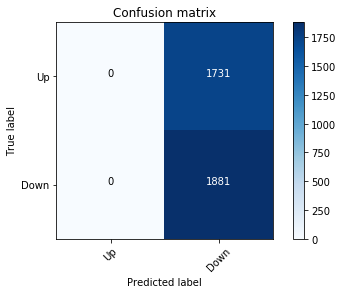

In [49]:
svm_best_random = CV_svm_random.best_estimator_
svm_best_random = svm_best_random.fit(X_train, y_train)
svm_best_prediction_random = svm_best_random.predict(X_test)
xtab = confusion_matrix(y_test, svm_best_prediction_random)
plot_confusion_matrix(xtab, classes=new_layer)

In [50]:
svm_best_acc_random = accuracy_score(y_test, svm_best_prediction_random)
print('Accuracy:',svm_best_acc_random)

Accuracy: 0.520764119601329


In [51]:
svm_best_acc_li = []
for ticket_name in ticket_li:
    ticket_df = df_removed[df_removed.symbol == ticket_name]
    ticket_X = ticket_df.iloc[:,2:-1]
    tiecket_y = ticket_df.tendency
    ticket_X_train, ticket_X_test, ticket_y_train, ticket_y_test = train_test_split(ticket_X, tiecket_y, test_size=0.2, shuffle=False)
    y_adj = np.array(ticket_y_train)
    scores = (cross_val_score(svm_best_random, ticket_X_train, y_adj, cv=10, scoring='accuracy')).mean()
    svm_best_acc_li.append([ticket_name, scores])
svm_best_acc_li

[['BIDU', 0.526558999253174],
 ['QCOM', 0.5279878530949348],
 ['IBM', 0.5154411607809666],
 ['CSCO', 0.5289592760180996],
 ['ADBE', 0.5478266997613085],
 ['CRM', 0.5029033749422098],
 ['TXN', 0.5555451829723674],
 ['INTC', 0.5257884972170687],
 ['NVDA', 0.526101568334578],
 ['MSFT', 0.5232173974892421],
 ['GOOGL', 0.517868177891022],
 ['ORCL', 0.5342992282798108],
 ['AAPL', 0.5096719457013574],
 ['MU', 0.5125840179238238]]

### Summary:
#### It seems that the SVM-classifer's performance is very low for predicting tendency of stock prices.  

Main Accuracy:
    - Original:52.07%
    - After tuning: 52.07%
Each Stock Accuracy:
    - BIDU: 52.65% to 52.65%
    - QCOM: 52.79% to 52.79%
    - IBM: 51.54% to 51.54%
    - CSCO: 52.89% to 52.89%
    - ADBE: 54.78% to 54.78%
    - CRM: 50.29% to 50.29%
    - TXN: 55.55% to 55.55%
    - INTC: 52.57% to 52.57%
    - NVDA: 52.61% to 52.61%
    - MSFT: 52.32% to 52.32%
    - GOOGL: 51.78% to 51.78%
    - ORCL: 53.42% to 53.42%
    - AAPL: 50.96% to 50.96%
    - MU: 51.25% to 51.25%

#### We assume that the support vector machine could seperate different class in a way to improve the dimension of the dataset. However, in this project, we failed to find a way to do that. 

#### On the other hand, the SVM might be just not the suitable way to predict tendency of stock prices with the predictors we collected.


## III.3 Neural Network
#### The third method we choose is Neural Network. 
#### Rather than fiting dataset into a simple regression, linear or non-linear algorithm, Neural Network method simulate the processes that human or animal recognized the object. 
#### An artificial neural network includes one input layer, multiple hidden layers with nodes(kernel) and bias,  one output layer including defined target classes. 
#### Each layers and nodes will be randomly generated when launching the training process. Input variables will be normalized firstly and multiple with each neural weights and plus an bias and connect with next layer. 
#### The target of each training process is reduce the difference between real labels and the predicted result. We could use sigmoid, adam or other algorithms to calculate the loss.
#### The revised information will transfer back to each layer and kernel and modify the weights and bias.
#### Finally, we will  get a neural network with relatively accurate weights and bias on each layer.

#### Before fiting the variable into neural network, we should normalize the input variables for each row first. Since the Neural Network Algorithm assume that the input variable is an number between 0 to 1.

In [52]:
from sklearn.preprocessing import Normalizer

In [53]:
df_removed.head()

,symbol,Date,Volume,basic_earning_per_share,enterprise_value,VWAP_volume,VWAP_bid_volume_percentage,VWAP_ask_volume_percentage,px_volume,turn_over,...,Volat,CMO.Ad,CMO.Vo,RunMean,RunSD,GMMA,KST,DPO,DVI,tendency
0,BIDU,2014-01-16,2975000,7.952,5.747847e+10,2914381,56.0385,56.0385,2975256,512783600.0,...,0.195193,5.660541,-36.456573,133.189018,190.302970,1.332843e+07,-315.754725,-11480300,0.596032,Up
1,QCOM,2014-01-16,10263200,1.110,9.463863e+10,10162472,53.2438,46.7562,10270124,766335500.0,...,0.194706,-2.040986,2.451821,104.865723,173.466198,1.179582e+07,-294.546266,-8751740,0.768254,Up
2,IBM,2014-01-16,4770300,2.300,2.280000e+11,4721754,58.0024,41.9976,4775167,898555500.0,...,0.192173,6.384432,-13.435674,121.638723,172.565988,8.283059e+06,-246.890280,-9011560,0.613492,Up
3,CSCO,2014-01-16,38918100,0.370,7.933212e+10,38599217,36.3774,63.6226,38925362,886703300.0,...,0.182808,-0.972015,7.983797,123.149723,171.520173,2.360058e+07,-191.905480,25906940,0.378571,Down
4,ADBE,2014-01-16,3747800,0.090,3.326501e+10,3666702,47.6594,52.3406,3747779,230889800.0,...,0.175726,1.249604,-4.414016,125.623723,170.311890,1.367419e+07,-113.246354,-9203390,0.365079,Up


#### I will build a function to convert the original data to normalized data from 0 to 1. The method I use is 'max' normalization, which is a method to calculate the 'position' of a value between the max value and min value.

In [54]:
def normalize_variable(nn_df,variable_names):
    variables_li = []
    for variable in variable_names:
        variables_li.append(nn_df[variable])
    encoder = Normalizer()
    to_array = np.asarray(variables_li)
    norm_result = encoder.fit_transform(to_array)
    norm_result = norm_result.T
    return norm_result

#### The Normalizer function can not recognize the categorical data. So I convert the 'Up' and 'Down' to 1 and 0.

In [55]:
df_removed.tendency  = np.where(df_removed.tendency == 'Up', 1, 0)

In [56]:
norm_result = normalize_variable(df_removed, list(df_removed.columns)[2:-1])

##### The result of normalization looks like array.

##### In order to create train and test samples, I convert the normalization array to dataframe.

In [58]:
X = pd.DataFrame(norm_result)

In [59]:
X.columns = list(df_removed.columns)[2:-1]
X.head()

,Volume,basic_earning_per_share,enterprise_value,VWAP_volume,VWAP_bid_volume_percentage,VWAP_ask_volume_percentage,px_volume,turn_over,egy_rec,MACD,...,MFI,Volat,CMO.Ad,CMO.Vo,RunMean,RunSD,GMMA,KST,DPO,DVI
0,0.000822,0.011293,0.004262,0.000844,0.008215,0.008229,0.000822,0.002010,0.007938,0.003456,...,0.005100,0.006490,0.002874,-0.024361,0.007783,0.007971,0.004710,-0.008239,-0.004371,0.007901
1,0.002837,0.001576,0.007017,0.002945,0.007805,0.006866,0.002838,0.003004,0.008080,0.004164,...,0.004704,0.006474,-0.001036,0.001638,0.006128,0.007266,0.004168,-0.007686,-0.003332,0.010184
2,0.001318,0.003266,0.016904,0.001368,0.008503,0.006167,0.001319,0.003523,0.006247,0.005342,...,0.005484,0.006390,0.003241,-0.008978,0.007108,0.007228,0.002927,-0.006442,-0.003431,0.008133
3,0.010757,0.000525,0.005882,0.011184,0.005333,0.009343,0.010755,0.003476,0.007227,0.005029,...,0.004865,0.006079,-0.000493,0.005335,0.007197,0.007184,0.008340,-0.005007,0.009865,0.005019
4,0.001036,0.000128,0.002466,0.001062,0.006987,0.007686,0.001036,0.000905,0.007724,0.004143,...,0.005175,0.005843,0.000634,-0.002950,0.007341,0.007134,0.004832,-0.002955,-0.003504,0.004840


In [60]:
y = df_removed.tendency

In [61]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, shuffle=False)

#### Train

In [62]:
nn = MLPClassifier(solver='lbfgs', alpha=1e-5, hidden_layer_sizes=(16, 3), random_state=1)
nn = nn.fit(X_train, y_train)

#### Predict

Confusion matrix, without normalization
[[1213  518]
 [ 539 1342]]


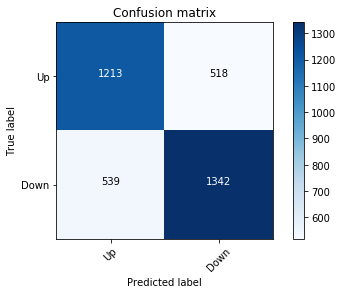

In [63]:
nn_prediction = nn.predict(X_test)
xtab = confusion_matrix(y_test, nn_prediction)
plot_confusion_matrix(xtab, classes=new_layer)

In [64]:
nn_acc = accuracy_score(y_test, nn_prediction)
print('Accuracy:',nn_acc)

Accuracy: 0.7073643410852714


In [65]:
new_layer = [1 , 0]

In [66]:
nn_acc_li = []
for ticket_name in ticket_li:
    ticket_df = df_removed[df_removed.symbol == ticket_name]
    norm_result = normalize_variable(ticket_df, list(ticket_df.columns)[2:-1])
    ticket_X = pd.DataFrame(norm_result)
    ticket_X.columns = list(ticket_df.columns)[2:-1]
    tiecket_y = ticket_df.tendency
    ticket_X_train, ticket_X_test, ticket_y_train, ticket_y_test = train_test_split(ticket_X, tiecket_y, test_size=0.2, shuffle=False)
    y_adj = np.array(ticket_y_train)
    scores = (cross_val_score(nn, ticket_X_train, y_adj, cv=10, scoring='accuracy')).mean()
    nn_acc_li.append([ticket_name, scores])
nn_acc_li

[['BIDU', 0.6677277819268111],
 ['QCOM', 0.6784577311133565],
 ['IBM', 0.6988678473629929],
 ['CSCO', 0.6996983408748114],
 ['ADBE', 0.6761808270731743],
 ['CRM', 0.7114216366158113],
 ['TXN', 0.7313853622106049],
 ['INTC', 0.7037208822923108],
 ['NVDA', 0.7368838685586259],
 ['MSFT', 0.7013093459938119],
 ['GOOGL', 0.6977176045922477],
 ['ORCL', 0.6976354066645329],
 ['AAPL', 0.7022058823529411],
 ['MU', 0.7254107542942494]]

##### I randomly map a neural network and got a relatively great result with accuracy 70.73%. And for seperated 'Up' and 'Down' class model, the performance of Neural Network seems good.  I will tune the Neural Network model and find if I could find appropriate parameters to build a more accurate Neural Network model.

##### Now, I will check what kinds of parameters could be tuned.

#### Parameters

In [67]:
nn.get_params().keys()

dict_keys(['activation', 'alpha', 'batch_size', 'beta_1', 'beta_2', 'early_stopping', 'epsilon', 'hidden_layer_sizes', 'learning_rate', 'learning_rate_init', 'max_iter', 'momentum', 'nesterovs_momentum', 'power_t', 'random_state', 'shuffle', 'solver', 'tol', 'validation_fraction', 'verbose', 'warm_start'])

In [68]:
type((sp_randint(1,100),(sp_randint(1,100))))

tuple

#### Tuning with gridsearch

In [69]:
#Tune
param_grid =  {'hidden_layer_sizes':[(5, 3),(10, 3), (20, 3), (50, 3),(100,3),(5,6),(10, 6), (16, 6), (20,6), (50, 6), (100, 6)], 
             'learning_rate_init': [0.0001, 0.0005, 0.001, 0.005, 0.01, 0.05, 0.1, 0.5]}
CV_nn_grid = GridSearchCV(nn, param_grid,refit = True)
CV_nn_grid.fit(X_train, y_train)
print (CV_nn_grid.best_params_)

{'hidden_layer_sizes': (16, 6), 'learning_rate_init': 0.0001}


Confusion matrix, without normalization
[[1176  555]
 [ 511 1370]]


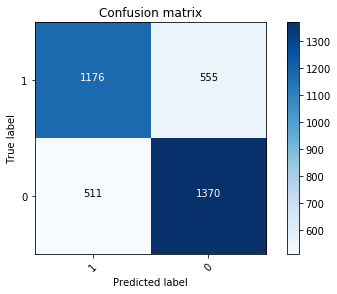

In [70]:
nn_best_grid = CV_nn_grid.best_estimator_
nn_best_grid = nn_best_grid.fit(X_train, y_train)
nn_best_prediction_grid = nn_best_grid.predict(X_test)
xtab = confusion_matrix(y_test, nn_best_prediction_grid)
plot_confusion_matrix(xtab, classes=new_layer)

In [71]:
nn_best_acc_grid = accuracy_score(y_test, nn_best_prediction_grid)
print('Accuracy:',nn_best_acc_grid)

Accuracy: 0.7048726467331119


##### After tuning with grid search, the accuracy only improve 0.23%.

#### Tuning with randomsearch

In [74]:
#Tune
param_random = {'hidden_layer_sizes':[(5, 3),(10, 3), (20, 3), (50, 3),(100,3),(5,6),(10, 6), (16, 6), (20,6), (50, 6), (100, 6)], 
             'learning_rate_init': [0.0001, 0.0005, 0.001, 0.005, 0.01, 0.05, 0.1, 0.5]}
n_iter_search = 88
CV_nn_random = RandomizedSearchCV(nn, param_distributions=param_random,n_iter=n_iter_search)

In [75]:
start = time()
CV_nn_random.fit(X_train, y_train)

RandomizedSearchCV(cv=None, error_score='raise',
          estimator=MLPClassifier(activation='relu', alpha=1e-05, batch_size='auto', beta_1=0.9,
       beta_2=0.999, early_stopping=False, epsilon=1e-08,
       hidden_layer_sizes=(16, 3), learning_rate='constant',
       learning_rate_init=0.001, max_iter=200, momentum=0.9,
       nesterovs_momentum=True, power_t=0.5, random_state=1, shuffle=True,
       solver='lbfgs', tol=0.0001, validation_fraction=0.1, verbose=False,
       warm_start=False),
          fit_params=None, iid=True, n_iter=88, n_jobs=1,
          param_distributions={'hidden_layer_sizes': [(5, 3), (10, 3), (20, 3), (50, 3), (100, 3), (5, 6), (10, 6), (16, 6), (20, 6), (50, 6), (100, 6)], 'learning_rate_init': [0.0001, 0.0005, 0.001, 0.005, 0.01, 0.05, 0.1, 0.5]},
          pre_dispatch='2*n_jobs', random_state=None, refit=True,
          return_train_score='warn', scoring=None, verbose=0)

In [76]:
print("RandomizedSearchCV took %.2f seconds for %d candidates"
      " parameter settings." % ((time() - start), n_iter_search))
report(CV_nn_random.cv_results_)

RandomizedSearchCV took 509.03 seconds for 88 candidates parameter settings.
Model with rank: 1
Mean validation score: 0.708 (std: 0.010)
Parameters: {'learning_rate_init': 0.0001, 'hidden_layer_sizes': (16, 6)}

Model with rank: 1
Mean validation score: 0.708 (std: 0.010)
Parameters: {'learning_rate_init': 0.0005, 'hidden_layer_sizes': (16, 6)}

Model with rank: 1
Mean validation score: 0.708 (std: 0.010)
Parameters: {'learning_rate_init': 0.001, 'hidden_layer_sizes': (16, 6)}

Model with rank: 1
Mean validation score: 0.708 (std: 0.010)
Parameters: {'learning_rate_init': 0.005, 'hidden_layer_sizes': (16, 6)}

Model with rank: 1
Mean validation score: 0.708 (std: 0.010)
Parameters: {'learning_rate_init': 0.01, 'hidden_layer_sizes': (16, 6)}

Model with rank: 1
Mean validation score: 0.708 (std: 0.010)
Parameters: {'learning_rate_init': 0.05, 'hidden_layer_sizes': (16, 6)}

Model with rank: 1
Mean validation score: 0.708 (std: 0.010)
Parameters: {'learning_rate_init': 0.1, 'hidden_laye

Confusion matrix, without normalization
[[1176  555]
 [ 511 1370]]


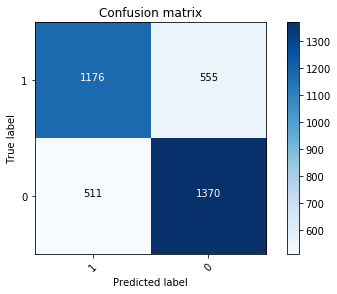

In [77]:
nn_best_random = CV_nn_random.best_estimator_
nn_best_random =nn_best_grid.fit(X_train, y_train)
nn_best_prediction_random = nn_best_random.predict(X_test)
xtab = confusion_matrix(y_test, nn_best_prediction_random)
plot_confusion_matrix(xtab, classes=new_layer)

In [78]:
nn_best_acc_random = accuracy_score(y_test, nn_best_prediction_random)
print('Accuracy:',nn_best_acc_random)

Accuracy: 0.7048726467331119


In [79]:
if nn_best_acc_random > nn_best_acc_grid:
    nn_best_m = nn_best_random
else:
    nn_best_m = nn_best_grid

In [80]:
nn_best_acc_li = []
for ticket_name in ticket_li:
    ticket_df = df_removed[df_removed.symbol == ticket_name]
    norm_result = normalize_variable(ticket_df, list(ticket_df.columns)[2:-1])
    ticket_X = pd.DataFrame(norm_result)
    ticket_X.columns = list(ticket_df.columns)[2:-1]
    tiecket_y = ticket_df.tendency
    ticket_X_train, ticket_X_test, ticket_y_train, ticket_y_test = train_test_split(ticket_X, tiecket_y, test_size=0.2, shuffle=False)
    y_adj = np.array(ticket_y_train)
    scores = (cross_val_score(nn_best_m, ticket_X_train, y_adj, cv=10, scoring='accuracy')).mean()
    nn_best_acc_li.append([ticket_name, scores])
nn_best_acc_li

[['BIDU', 0.6793035847647498],
 ['QCOM', 0.6881013047489347],
 ['IBM', 0.7105459831430705],
 ['CSCO', 0.7055429864253393],
 ['ADBE', 0.7013031015244036],
 ['CRM', 0.7134745190084997],
 ['TXN', 0.7236463778939506],
 ['INTC', 0.717862296433725],
 ['NVDA', 0.7329817027632562],
 ['MSFT', 0.7090759806536506],
 ['GOOGL', 0.6899597665802693],
 ['ORCL', 0.6880837689818272],
 ['AAPL', 0.7050339366515838],
 ['MU', 0.7069921583271098]]

### Summary:
#### The Neural Network model perform well. The accuracy before and after tuning perform very well. Also, the model perform well when assigned to each stock.

Main Accuracy:
    - Original:
    - After tuning: 
Each Stock Accuracy:
    - BIDU: % to %
    - QCOM: % to %
    - IBM: % to %
    - CSCO: % to %
    - ADBE: % to %
    - CRM: % to %
    - TXN: % to %
    - INTC: % to %
    - NVDA: % to %
    - MSFT: % to %
    - GOOGL: % to %
    - ORCL: % to %
    - AAPL: % to %
    - MU: % to %
    
#### The tuning result seems similar to the random map I draw and even lower than it.  It seems tuning only slightly elevate the performance of the Neural Network model. In order to improve the performance of Neural Network Model, I think more data are required to fit the Neural Network Model rather than continually tune the model.
  

## IV. Conclusion

### IV.1 Objective:
#### The objective of this project is to predict the tendency of stock prices with using Machine Learning Algorithms. 

### IV.2 Data & Variables:
#### In order to reach this target, we collect the real data from Bloomberg. There are 49 independent variables as following:

In [82]:
print(list(df.columns)[2:])

['Open', 'High', 'Low', 'Close', 'Adj.Close', 'Volume', 'revenue', 'gross_profit', 'net_income', 'cash_from_operation', 'basic_earning_per_share', 'free_cash_flow', 'market_capital', 'enterprise_value', 'VWAP_volume', 'VWAP_bid_volume_percentage', 'VWAP_ask_volume_percentage', 'px_ask', 'px_bid', 'px_mid', 'px_volume', 'total_analyst_recommendation', 'turn_over', 'egy_rec', 'MACD', 'RSI', 'TRIX', 'SAR', 'ROC.Vo', 'ROC.Cl', 'CCI', 'ATR', 'SMI', 'ADX', 'Aroon', 'BB', 'ChaikinVol', 'CLV', 'EMV', 'MFI', 'Volat', 'CMO.Ad', 'CMO.Vo', 'RunMean', 'RunSD', 'GMMA', 'KST', 'DPO', 'DVI', 'tendency']


#### The dependent variable is tendency.

Tendency: 
- 'Up': Close price - Open price > 0
- 'Down': Close price - Open price < 0

#### Originally, there are 49 independent variables including basic price information, price and volume information, financial information and technical predictor. 

#### After fiting random forest, I find some insignificant variables and remove tailed 15 variables from the dataset. 

The variables removed:
- Financial Information:
    - revenue
    - gross_profit
    - net_income
    - cash_from_operation
    - free_cash_flow
    - market_capital
- percentage of buy&sell volume:
    - px_mid
    - px_ask
    - px_bid
- price information:
    - Close
    - Low 
    - High
    - Open
    - Adj.Close
- Investor's Interest:
    - total_analyst_recommendation

#### Since the financial information is quarterly data, it is hard to influence the daily tendency of stock price. The percentage information is too normalized that could not reflect the change of stock price. 

#### At the first glance, it surprice us that the basic price information are influence little of the tendency of stock price. After consideration, we find that the target, tendency of stock price, represent the differences between Open price and Close price. This differences already take those basic price information into account, that might be why the basic price information insignificant to predict the tendency.

#### After removing tailed 15 insignificant variables, there are 34 independent variables for following two algorithms, SVM and Neural Network.

### IV.3 Method and Model:

#### The dataset: 
- 1 * Main Dataset including 14 stocks 
- 14 * each stock dataset 

#### Algorithms:
- Random Forest
- SVM
- Neural Network


#### I will use the accuracy to represent the performance of each algorithms.

#### - Random Forest

In [83]:
rf_acc_clean_li = []
for i in range(len(rf_acc_li)):
    possibility = rf_acc_li[i][1]
    rf_acc_clean_li.append(possibility)

rf_best_acc_clean_li = []
for i in range(len(rf_best_acc_li)):
    possibility = rf_best_acc_li[i][1]
    rf_best_acc_clean_li.append(possibility)

In [85]:
rf_acc_df = pd.DataFrame({'stock_name':ticket_li, 'before_tuning':rf_acc_clean_li, 'after_tuning':rf_best_acc_clean_li})
rf_acc_main = {'stock_name':'main', 'before_tuning':rf_acc, 'after_tuning':rf_best_acc_grid}
rf_acc_df.loc[-1] = rf_acc_main

In [86]:
rf_acc_df

,after_tuning,before_tuning,stock_name
0,0.694679,0.634839,BIDU
1,0.682275,0.640712,QCOM
2,0.693191,0.655596,IBM
3,0.700641,0.658220,CSCO
4,0.683986,0.682073,ADBE
5,0.718227,0.670924,CRM
6,0.715935,0.690842,TXN
7,0.714832,0.663255,INTC
8,0.728165,0.684625,NVDA
9,0.706127,0.656613,MSFT


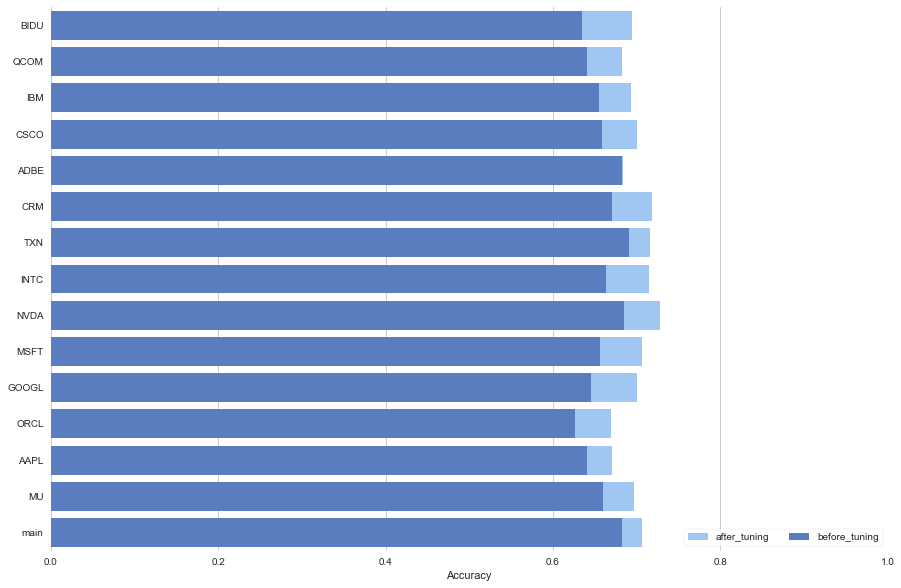

In [104]:
sns.set(style="whitegrid")

# Initialize the matplotlib figure
f, ax = plt.subplots(figsize=(15, 10))

# Plot the total crashes
sns.set_color_codes("pastel")
sns.barplot(x="after_tuning", y="stock_name", data=rf_acc_df,
            label="after_tuning", color="b")

# Plot the crashes where alcohol was involved
sns.set_color_codes("muted")
sns.barplot(x="before_tuning", y="stock_name", data=rf_acc_df,
            label="before_tuning", color="b")

# Add a legend and informative axis label
ax.legend(ncol=2, loc="lower right", frameon=True)
ax.set(xlim=(0, 1), ylabel="",
       xlabel="Accuracy")
sns.despine(left=True, bottom=True)

#### - SVM

In [107]:
svm_acc_clean_li = []
for i in range(len(svm_acc_li)):
    possibility = rf_acc_li[i][1]
    svm_acc_clean_li.append(possibility)

svm_best_acc_clean_li = []
for i in range(len(svm_best_acc_li)):
    possibility = svm_best_acc_li[i][1]
    svm_best_acc_clean_li.append(possibility)

In [108]:
svm_acc_df = pd.DataFrame({'stock_name':ticket_li, 'before_tuning':svm_acc_clean_li, 'after_tuning':svm_best_acc_clean_li})
svm_acc_main ={'stock_name':'main', 'before_tuning':svm_acc, 'after_tuning':svm_best_acc_random}
svm_acc_df.loc[-1] = svm_acc_main

In [109]:
svm_acc_df

,after_tuning,before_tuning,stock_name
0,0.526559,0.634839,BIDU
1,0.527988,0.640712,QCOM
2,0.515441,0.655596,IBM
3,0.528959,0.658220,CSCO
4,0.547827,0.682073,ADBE
5,0.502903,0.670924,CRM
6,0.555545,0.690842,TXN
7,0.525788,0.663255,INTC
8,0.526102,0.684625,NVDA
9,0.523217,0.656613,MSFT


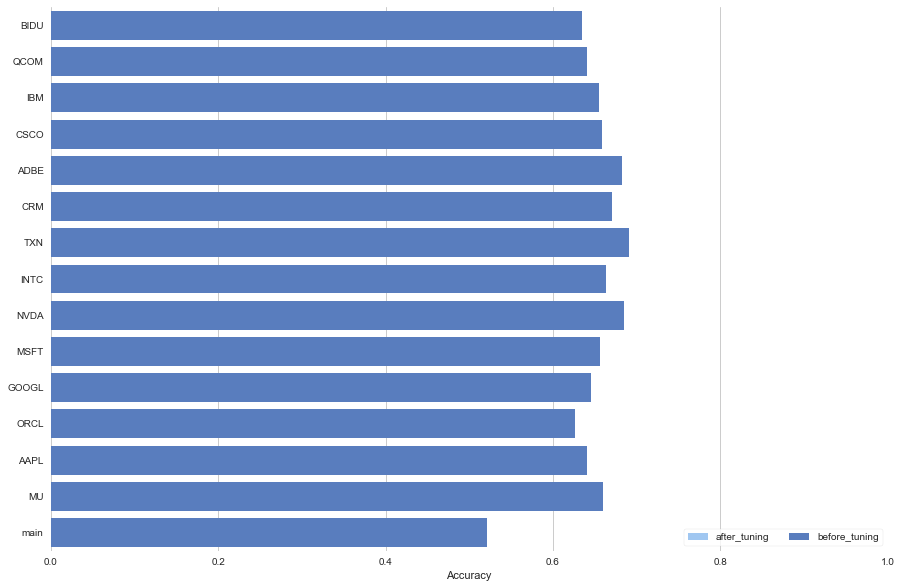

In [110]:
sns.set(style="whitegrid")

# Initialize the matplotlib figure
f, ax = plt.subplots(figsize=(15, 10))

# Plot the total crashes
sns.set_color_codes("pastel")
sns.barplot(x="after_tuning", y="stock_name", data=svm_acc_df,
            label="after_tuning", color="b")

# Plot the crashes where alcohol was involved
sns.set_color_codes("muted")
sns.barplot(x="before_tuning", y="stock_name", data=svm_acc_df,
            label="before_tuning", color="b")

# Add a legend and informative axis label
ax.legend(ncol=2, loc="lower right", frameon=True)
ax.set(xlim=(0, 1), ylabel="",
       xlabel="Accuracy")
sns.despine(left=True, bottom=True)

#### - Neural Network

In [99]:
nn_acc_clean_li = []
for i in range(len(svm_acc_li)):
    possibility = rf_acc_li[i][1]
    nn_acc_clean_li.append(possibility)

nn_best_acc_clean_li = []
for i in range(len(rf_best_acc_li)):
    possibility = rf_best_acc_li[i][1]
    nn_best_acc_clean_li.append(possibility)

In [100]:
nn_acc_df = pd.DataFrame({'stock_name':ticket_li, 'before_tuning':nn_acc_clean_li, 'after_tuning':nn_best_acc_clean_li})
nn_acc_main = {'stock_name':'main', 'before_tuning':nn_acc, 'after_tuning':nn_best_acc_random}
nn_acc_df.loc[-1] = nn_acc_main

In [101]:
nn_acc_df

,after_tuning,before_tuning,stock_name
0,0.694679,0.634839,BIDU
1,0.682275,0.640712,QCOM
2,0.693191,0.655596,IBM
3,0.700641,0.658220,CSCO
4,0.683986,0.682073,ADBE
5,0.718227,0.670924,CRM
6,0.715935,0.690842,TXN
7,0.714832,0.663255,INTC
8,0.728165,0.684625,NVDA
9,0.706127,0.656613,MSFT


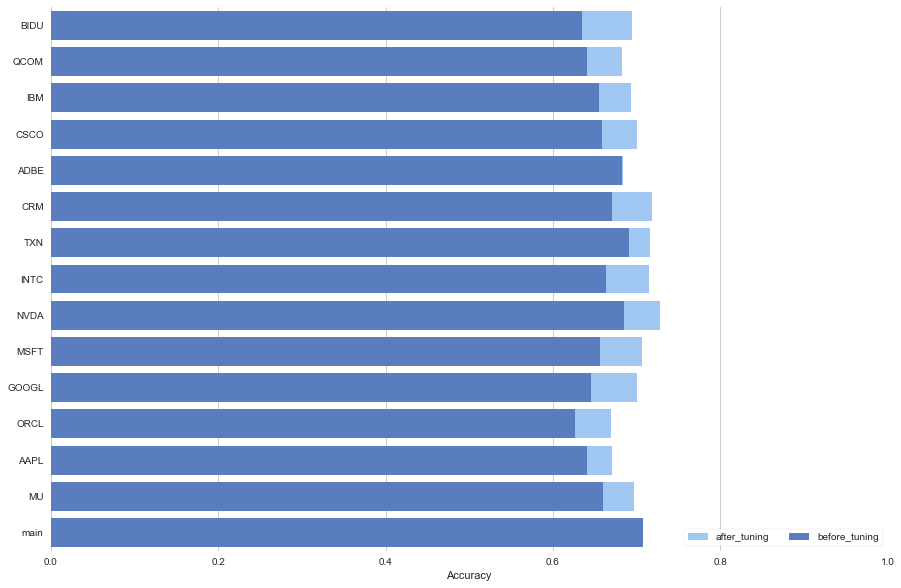

In [106]:
sns.set(style="whitegrid")

# Initialize the matplotlib figure
f, ax = plt.subplots(figsize=(15, 10))

# Plot the total crashes
sns.set_color_codes("pastel")
sns.barplot(x="after_tuning", y="stock_name", data=nn_acc_df,
            label="after_tuning", color="b")

# Plot the crashes where alcohol was involved
sns.set_color_codes("muted")
sns.barplot(x="before_tuning", y="stock_name", data=nn_acc_df,
            label="before_tuning", color="b")

# Add a legend and informative axis label
ax.legend(ncol=2, loc="lower right", frameon=True)
ax.set(xlim=(0, 1), ylabel="",
       xlabel="Accuracy")
sns.despine(left=True, bottom=True)

### IV. 4 Comparision and Discussion

#### In a word, we think the Neural Network and Random Forest model perform better than SVM model. And we will choose Neural Network model rather than random forest model since we assume that if we collect more data to train the Neural Network model. The performance of Neural Network would be better than now.